<a href="https://colab.research.google.com/github/rocketwolf98/ColabCompilation/blob/main/KNNInstances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Thingamabob

In [3]:
# !pip install fireducks
# !pip install mglearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import fireducks.pandas as pd

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.8 MB/s eta 0:00:00


### Generating Instances for MGlearn

In [61]:
X, y = mglearn.datasets.make_forge()
mglearn.datasets.make_forge()

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [11]:
print(f"First feature: {X[:, 0]}")
print(f"Second feature: {X[:, 1]}")
print(f"Target feature: {y}")

First feature: [ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256 10.06393839  9.50048972  8.34468785  9.50169345
  9.15072323 11.563957  ]
Second feature: [ 4.59676542 -0.16816717  5.21116083  1.54322016  4.28695977  4.80623966
  4.64866327 -0.20283165  5.13415623  4.47573059  5.09283177  2.45544401
  1.48709629 -0.63993225  4.33224792  5.13284858  4.8525051   1.29564214
  2.49162431  5.09840649  0.99078055 -0.26430318  1.63824349  1.93824624
  5.49832246  1.3389402 ]
Target feature: [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


In [135]:
#Analysis for best k-neighbors
from sklearn.model_selection import train_test_split

def plot_instance(X, y, k_range=(1,15), instances= 20):

  '''
  Function that passes the acceptable range of k_neighbors and parses the number of instances based
  on the number of random states. Also passes a graph of the number of instances with the accuracy of
  each random states.
  '''

  k_values = range(k_range[0], k_range[1]+1)

  for n in range(instances):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=n)
    traning_accuracy =[]
    test_accuracy = []

    for k in k_values:
      clf = KNeighborsClassifier(n_neighbors=k)
      clf.fit(X_train, y_train)
      traning_accuracy.append(clf.score(X_train, y_train))
      test_accuracy.append(clf.score(X_test, y_test))

    plt.figure(figsize=(10,6))
    plt.plot(k_values, traning_accuracy, label="Training accuracy", marker= "o")
    plt.plot(k_values, test_accuracy, label="Testing accuracy", marker="o")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.suptitle(f"K-neighbors with instance: {n}")
    plt.title(f"Accuracy: {clf.score(X_test, y_test)}")
    plt.legend()
    plt.show()

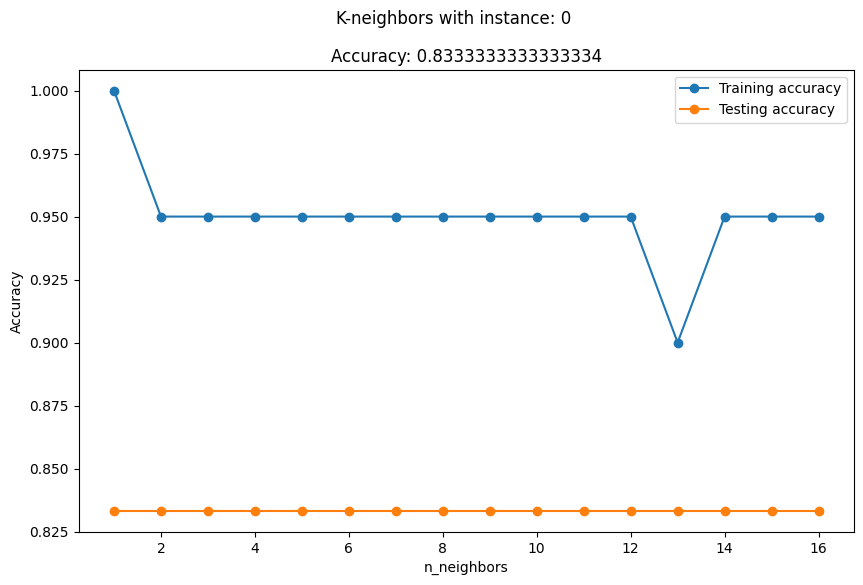

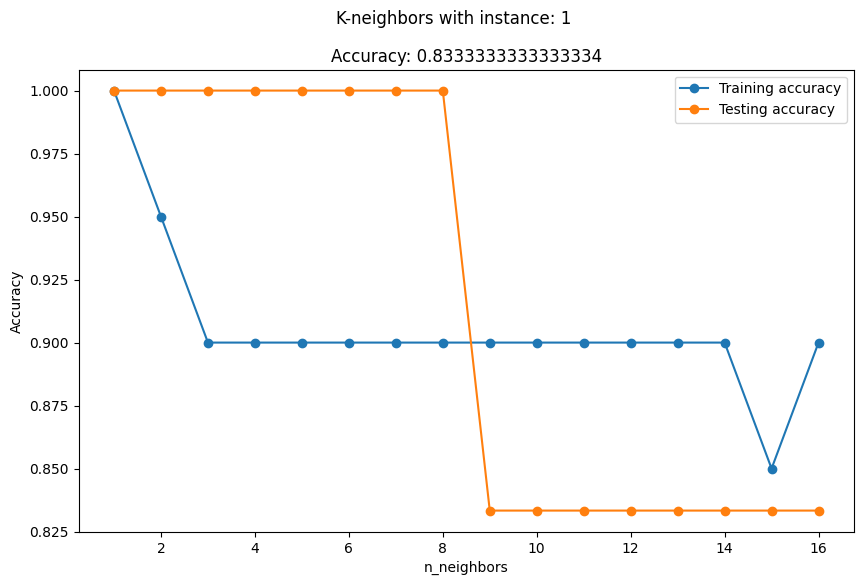

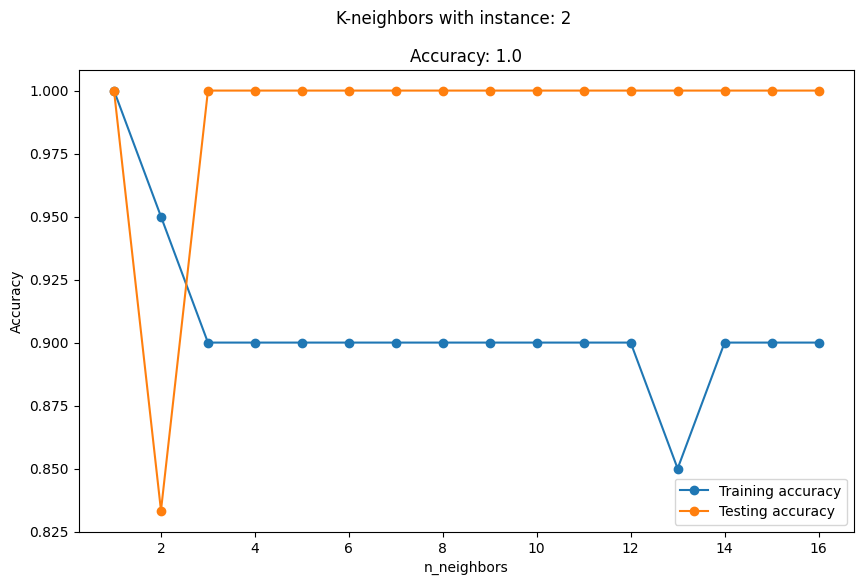

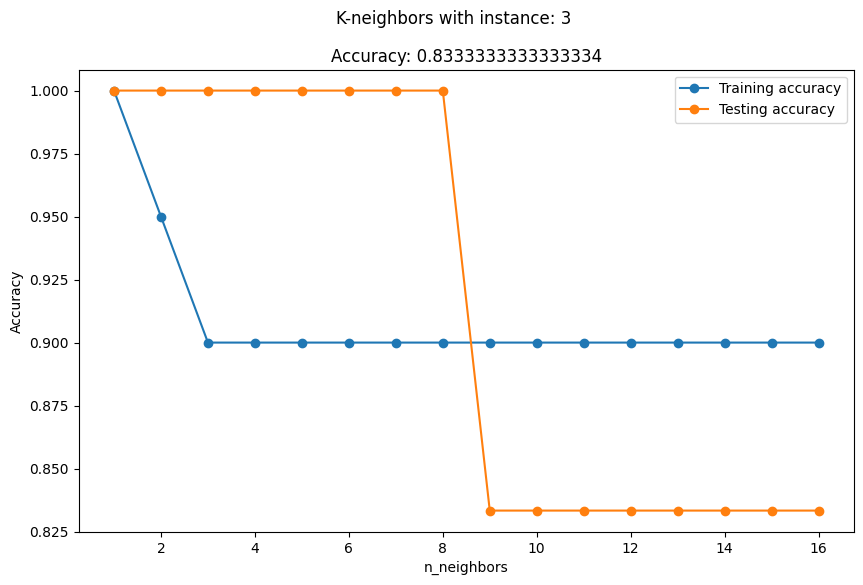

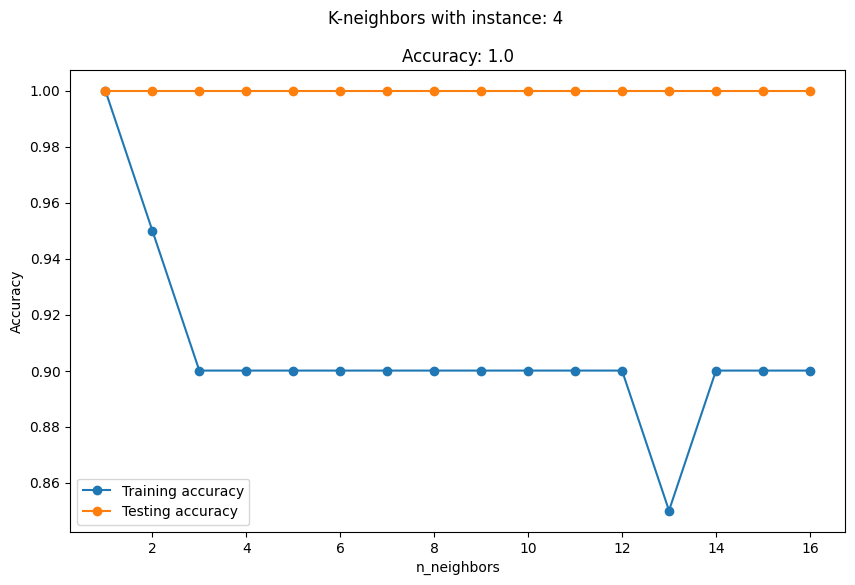

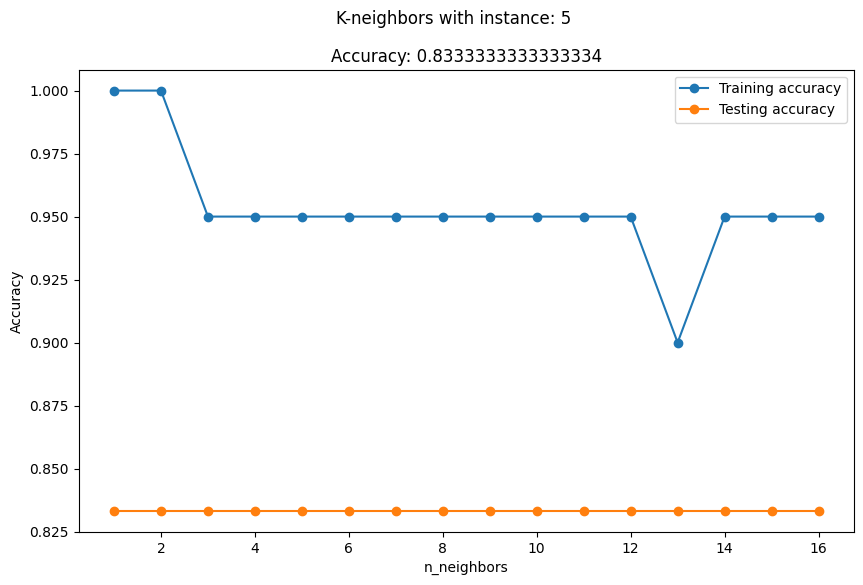

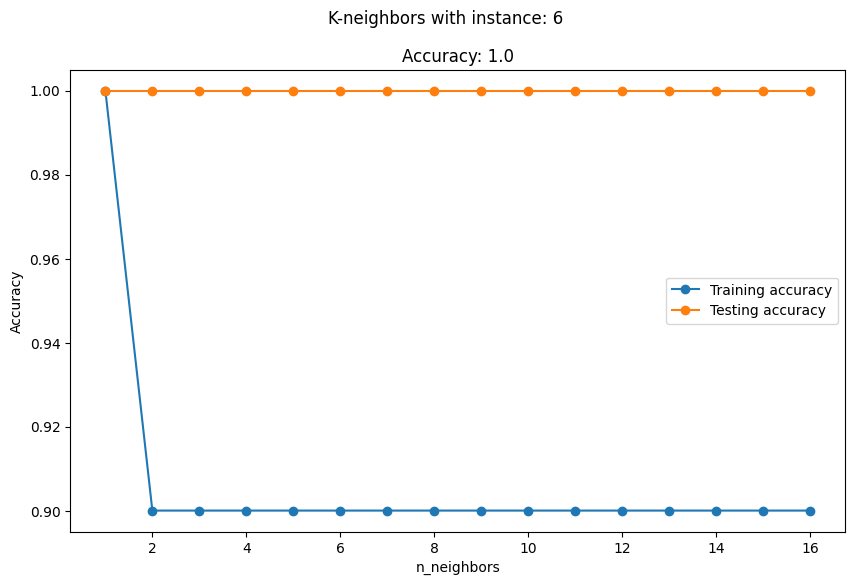

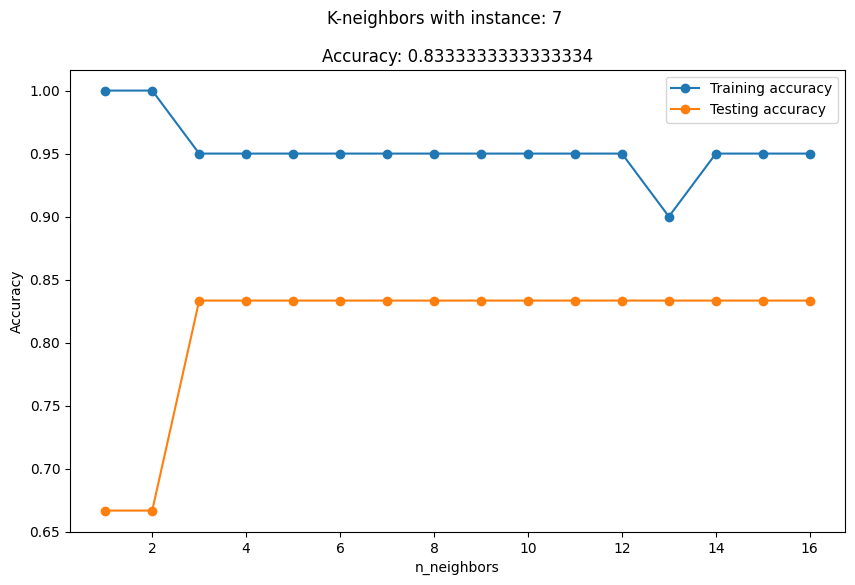

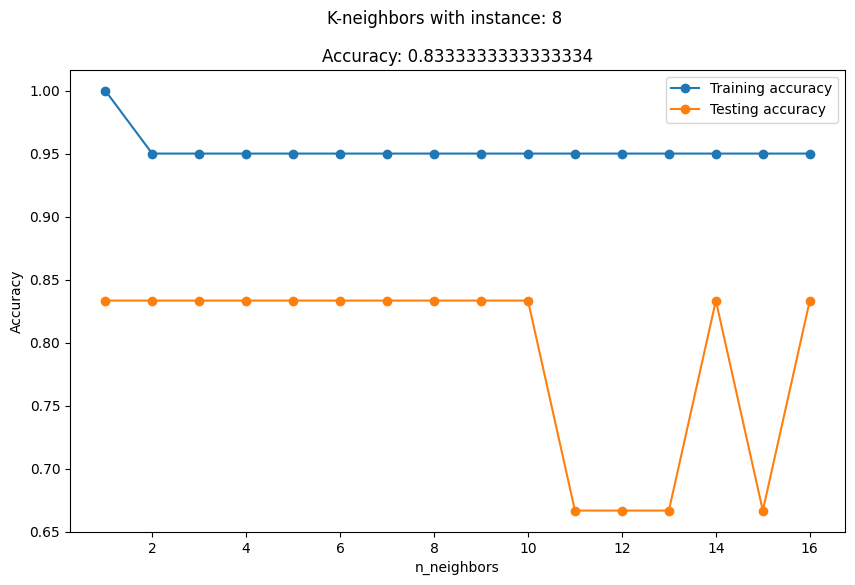

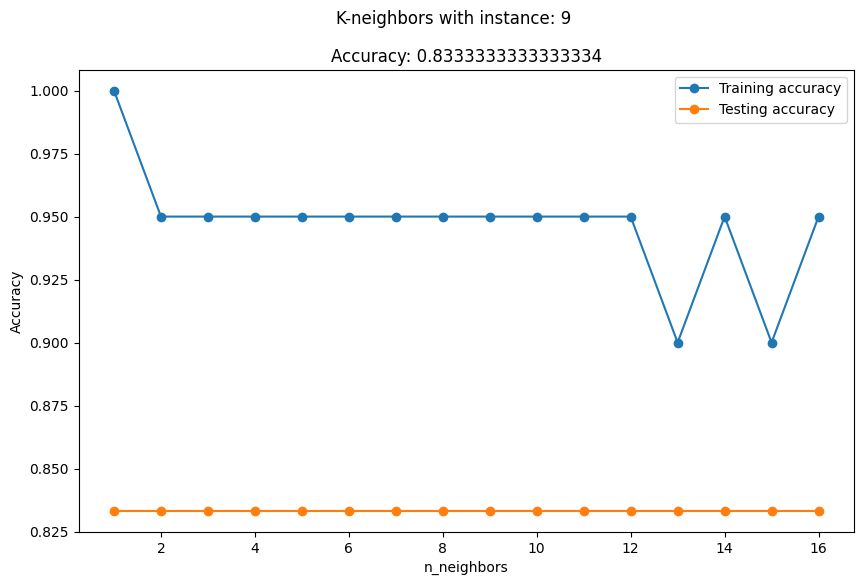

In [137]:
plot_instance(X, y, k_range = (1,16), instances=10)

## Generating Instances for Iris Dataset

In [123]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [130]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [131]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [132]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [134]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

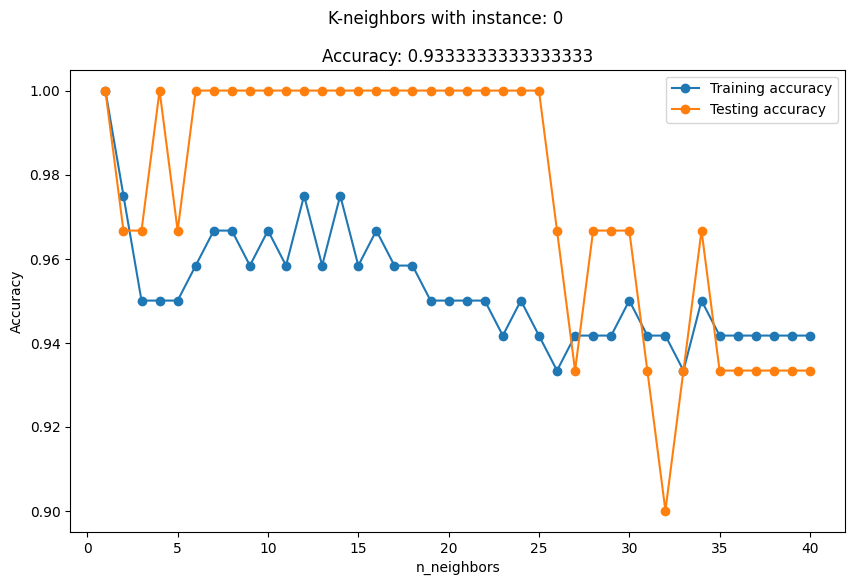

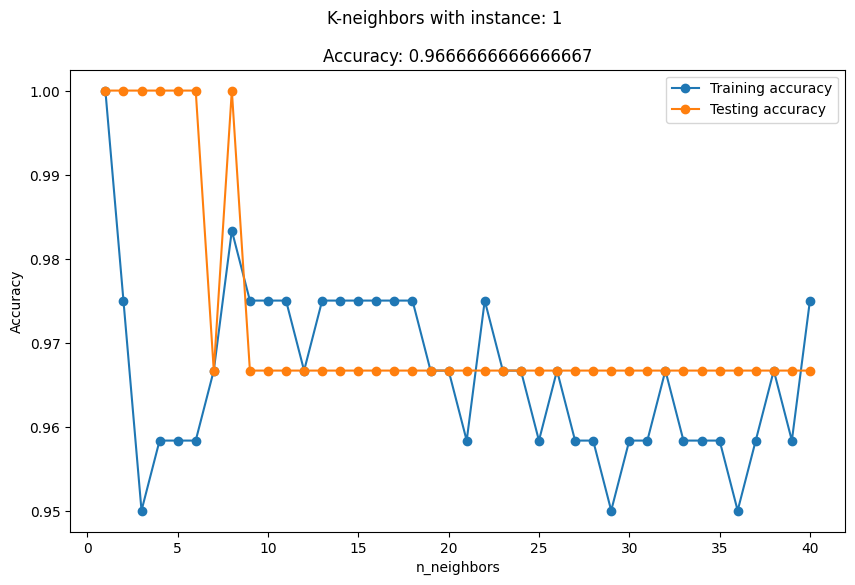

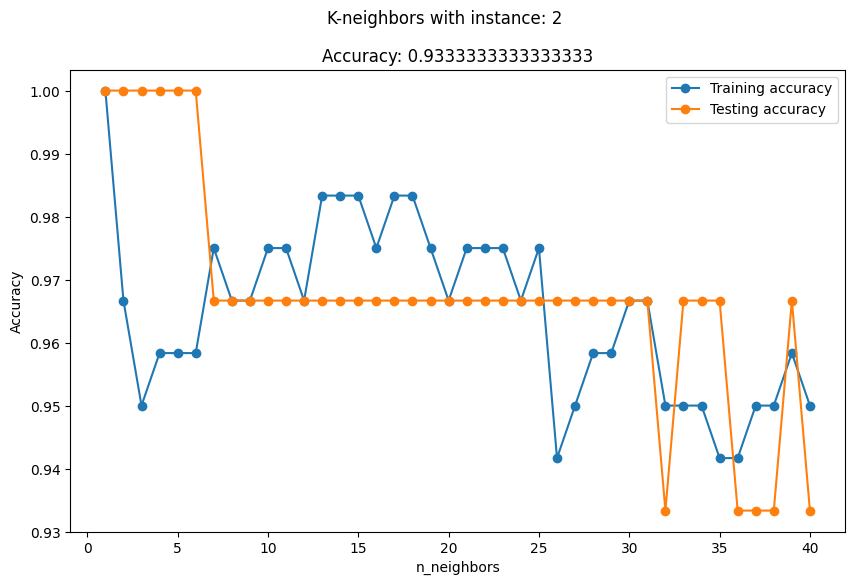

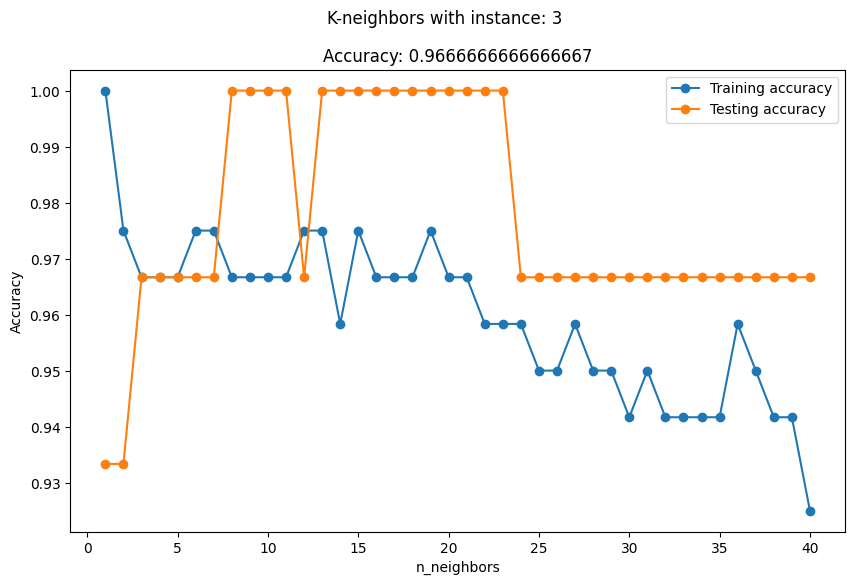

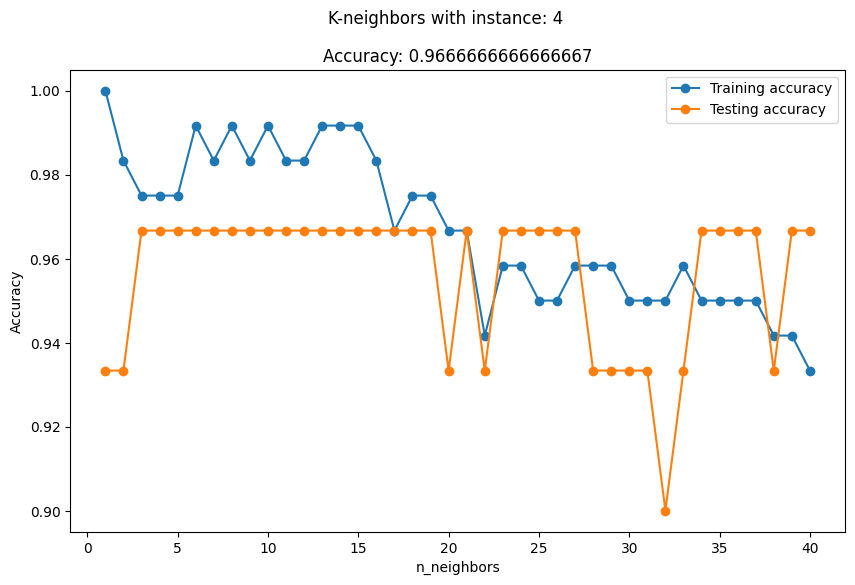

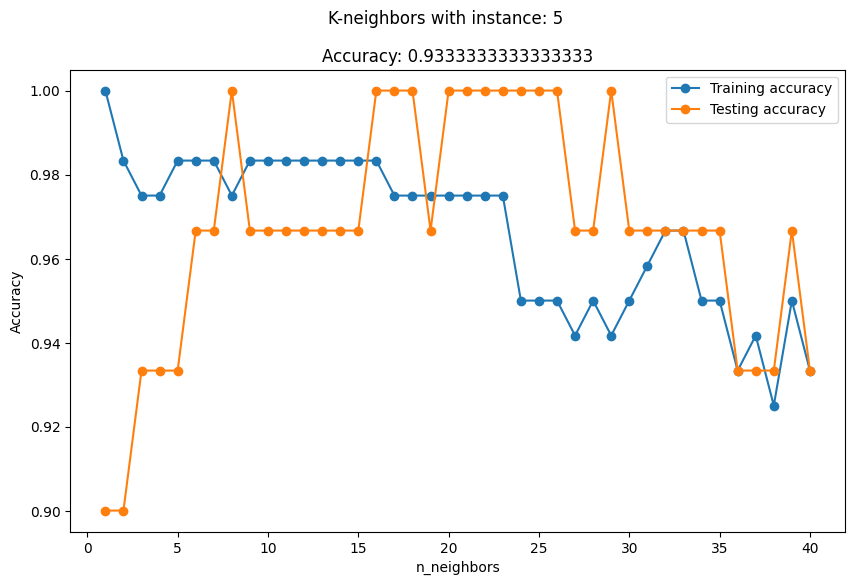

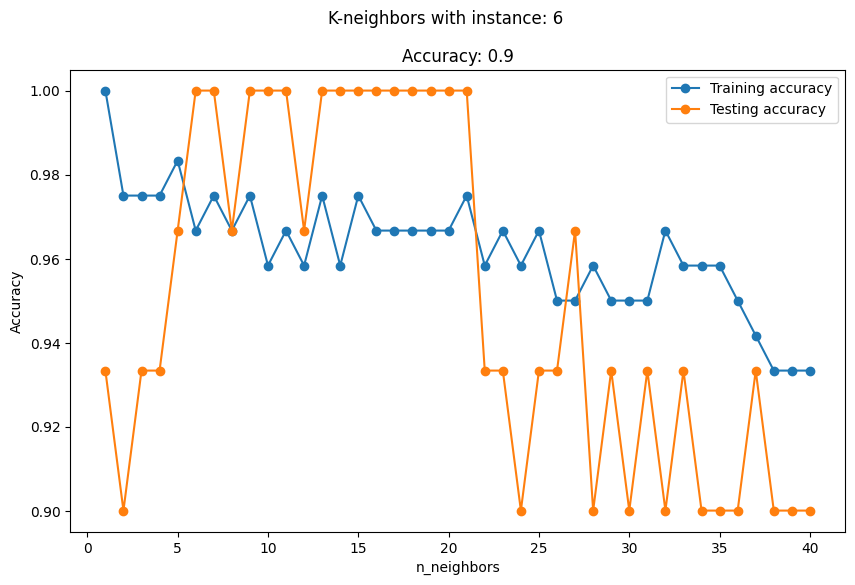

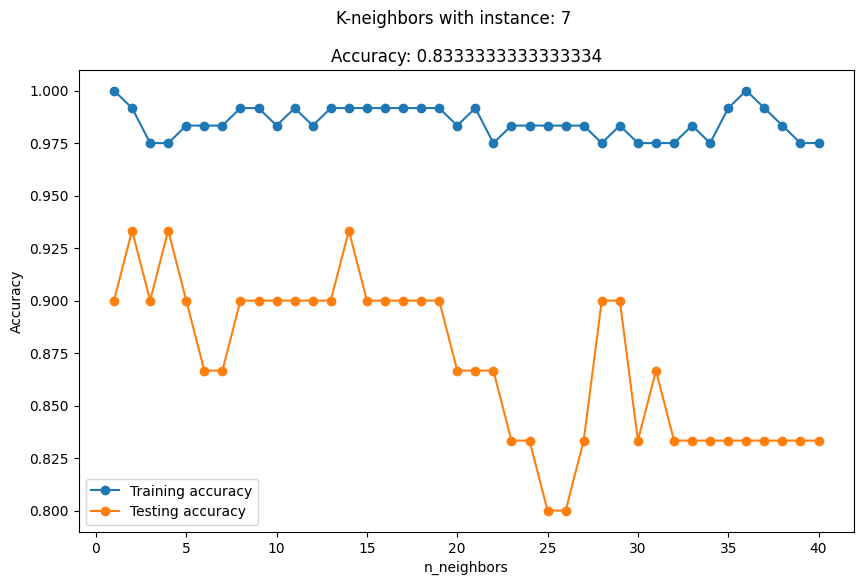

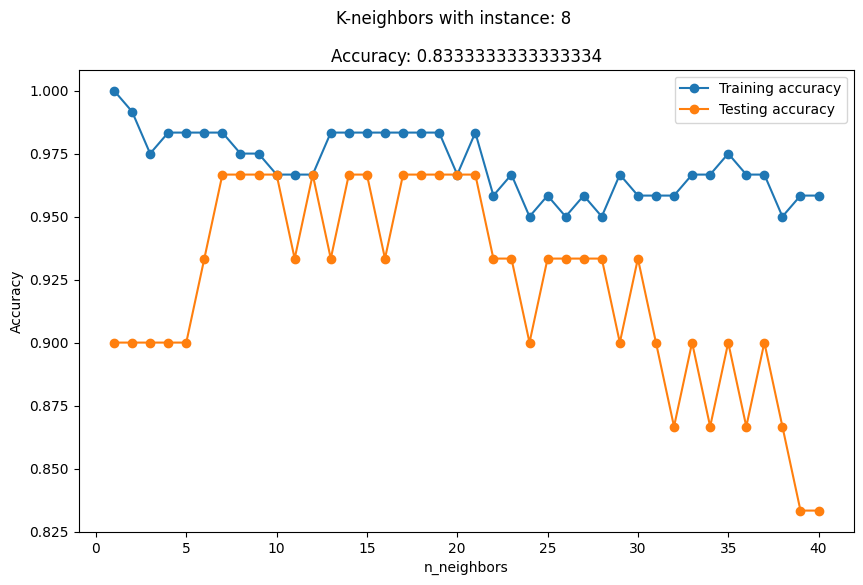

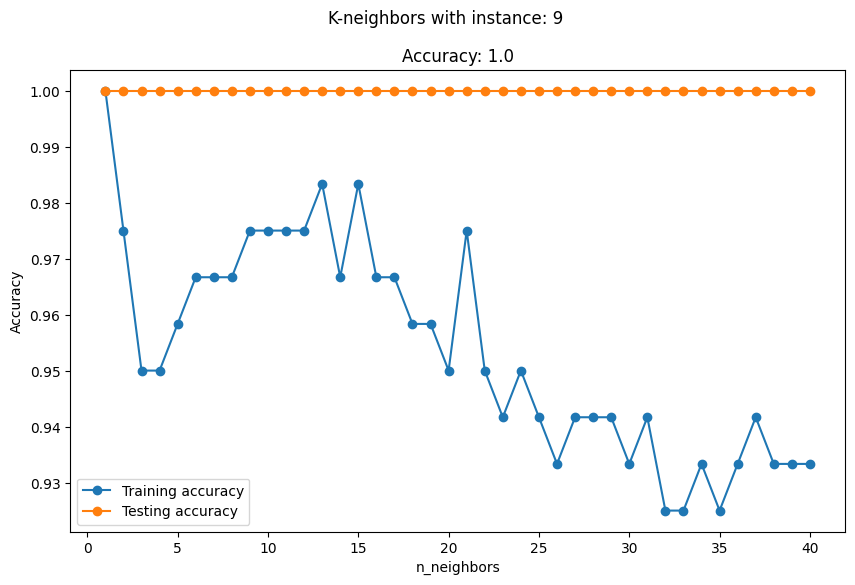

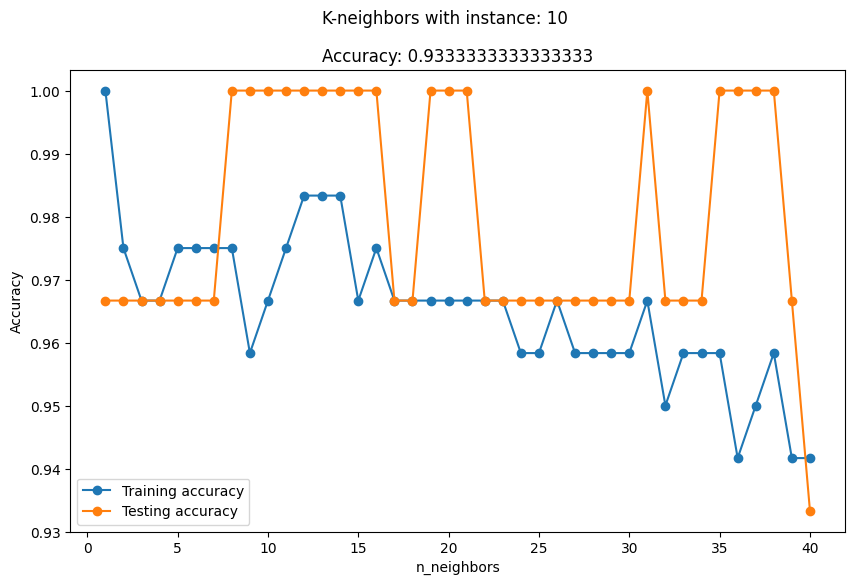

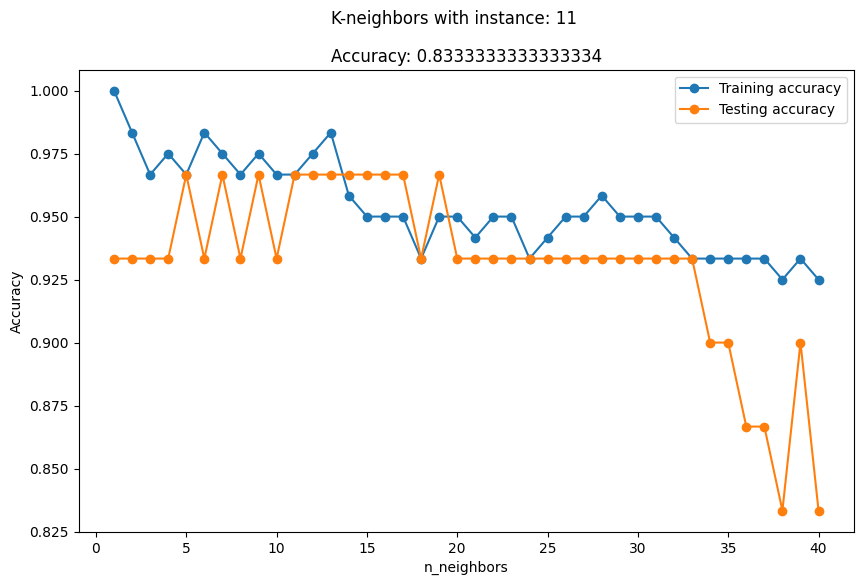

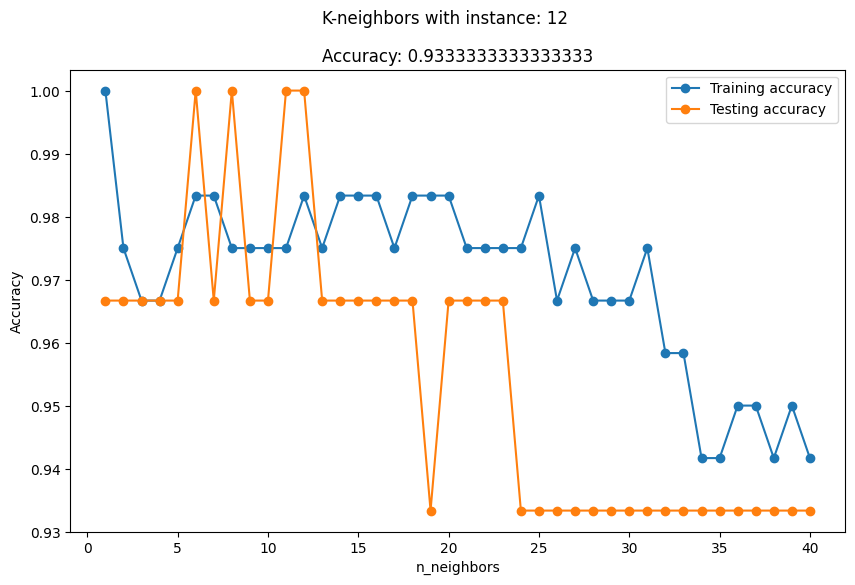

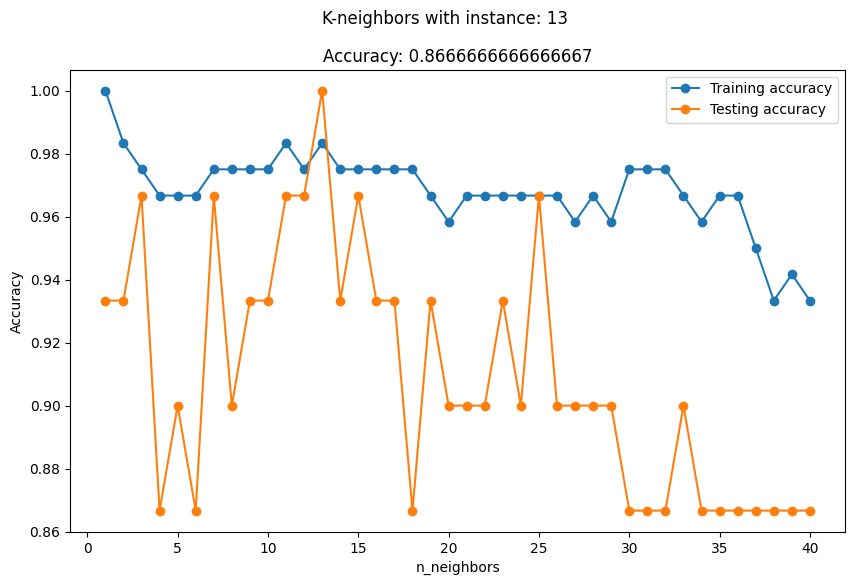

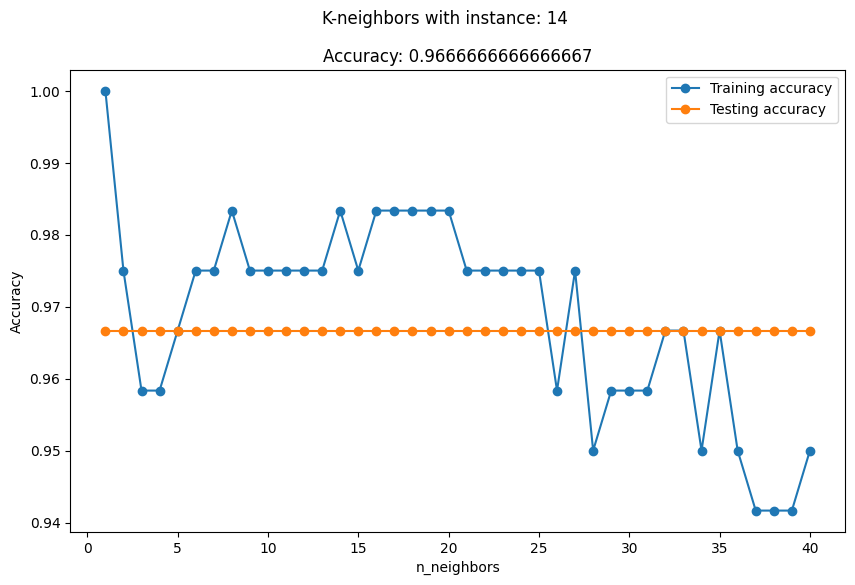

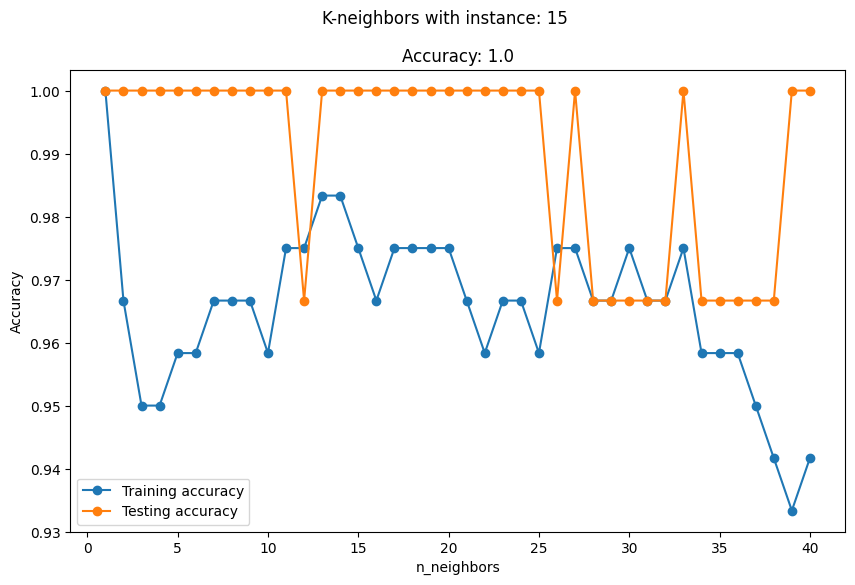

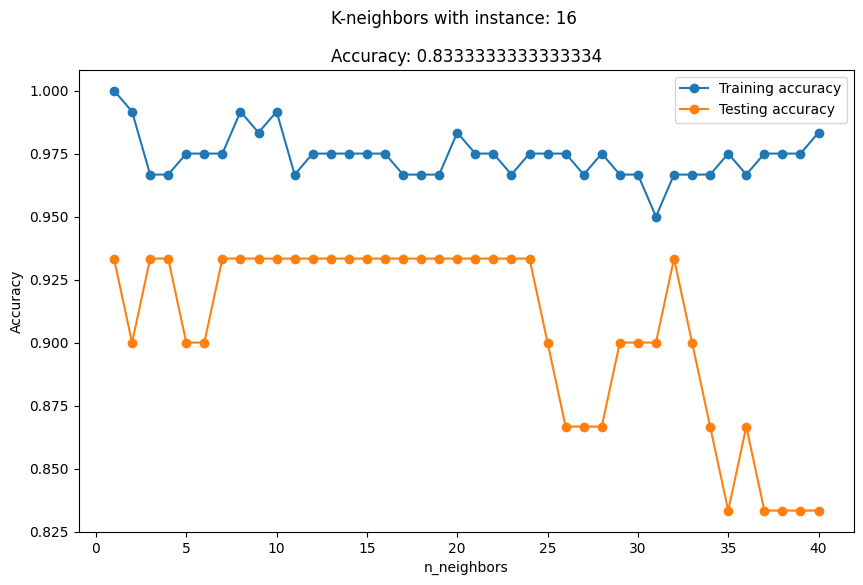

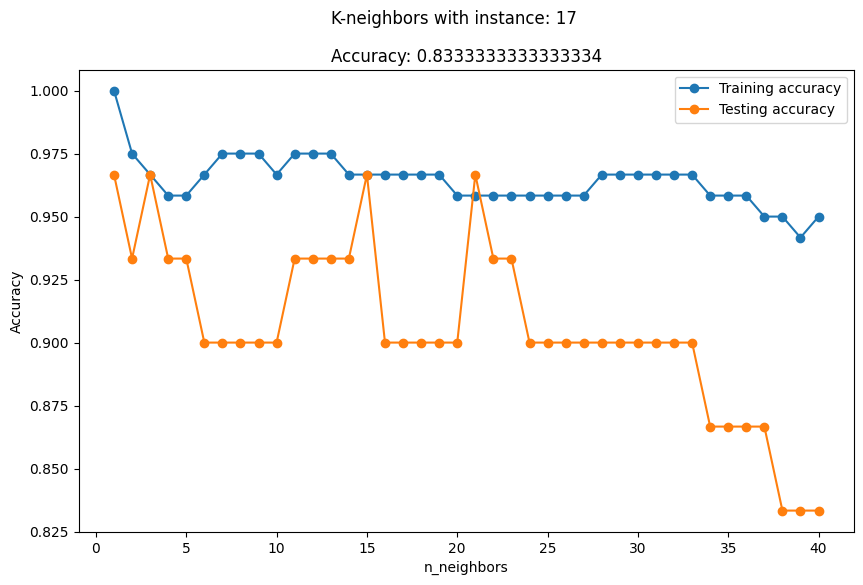

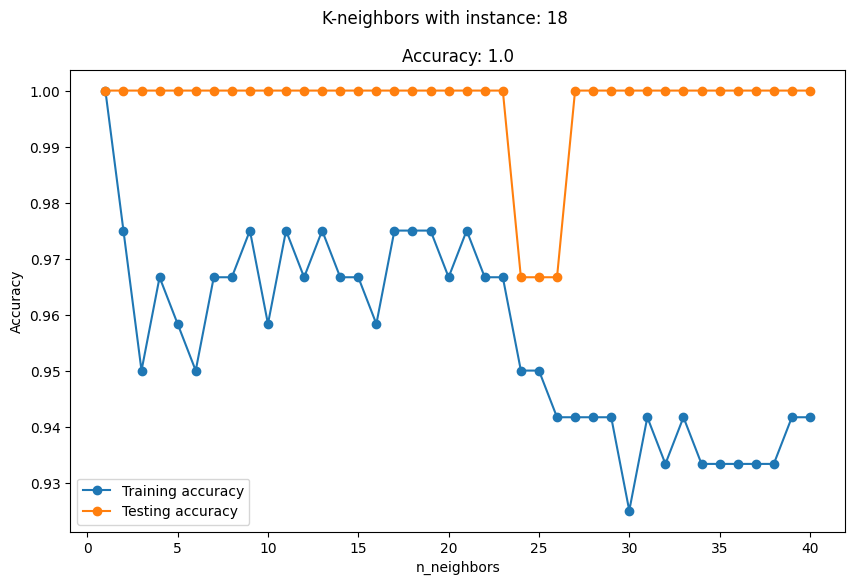

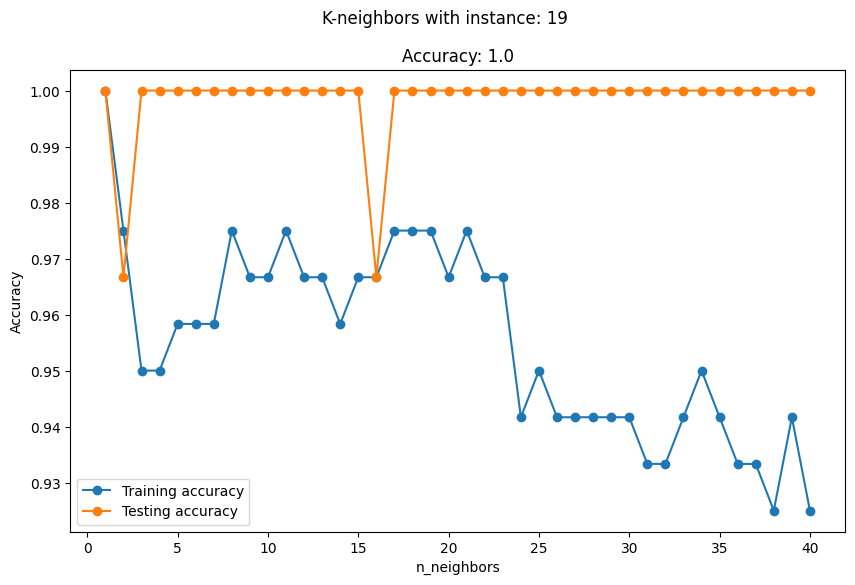

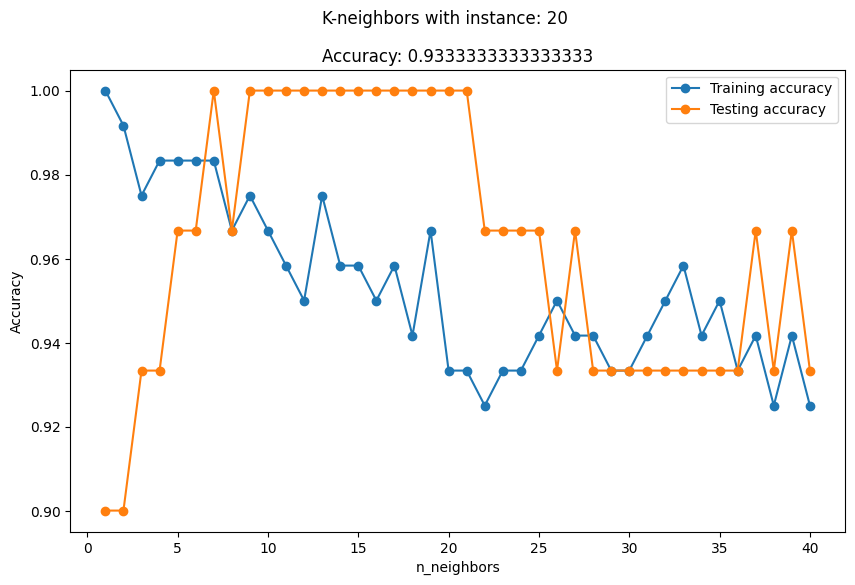

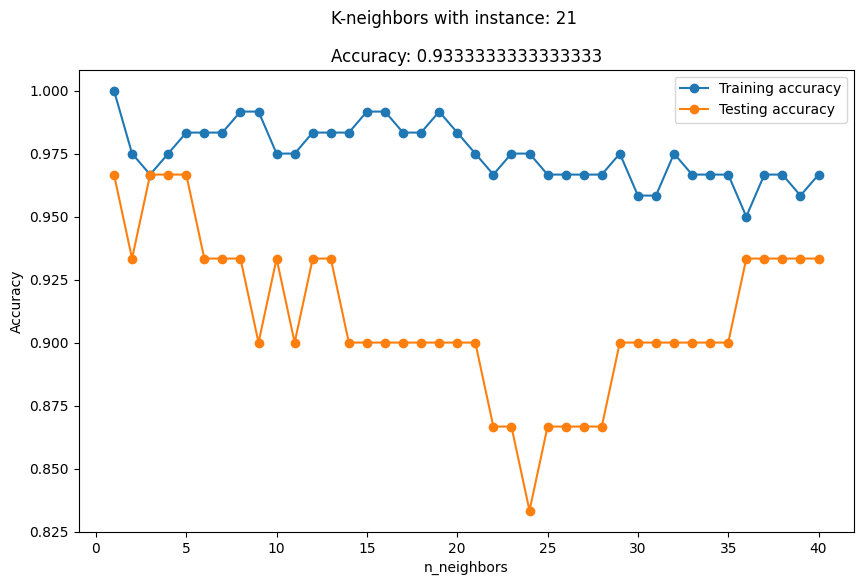

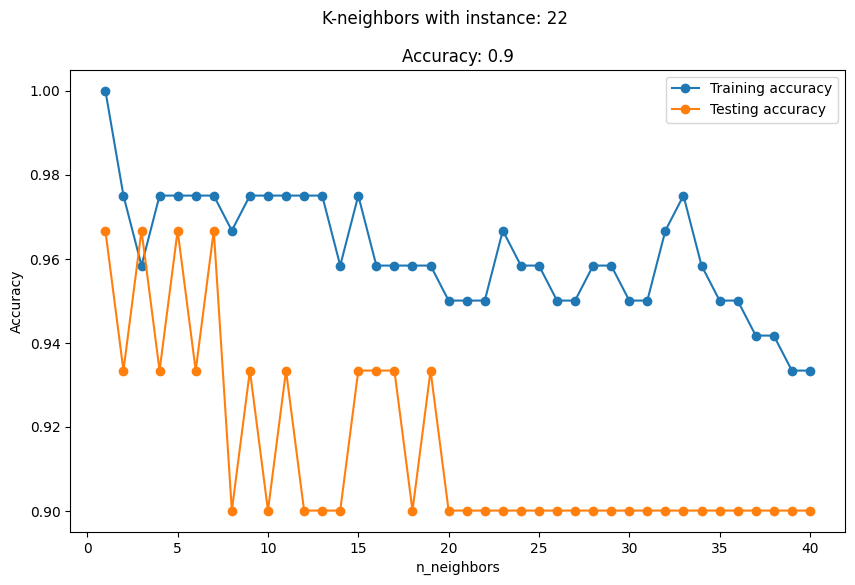

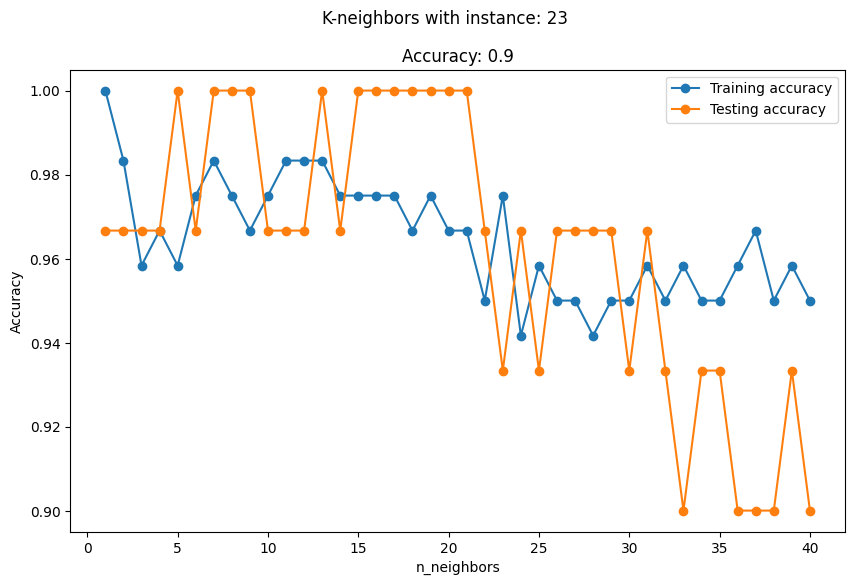

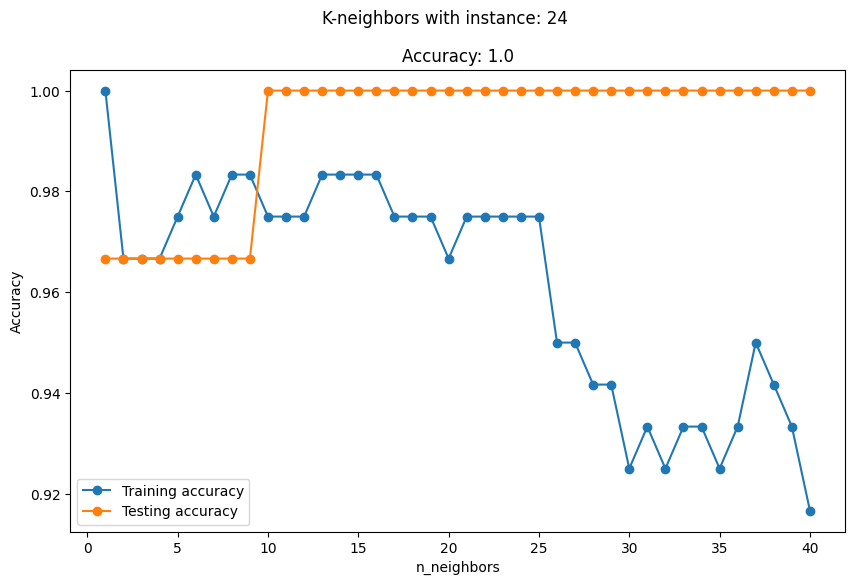

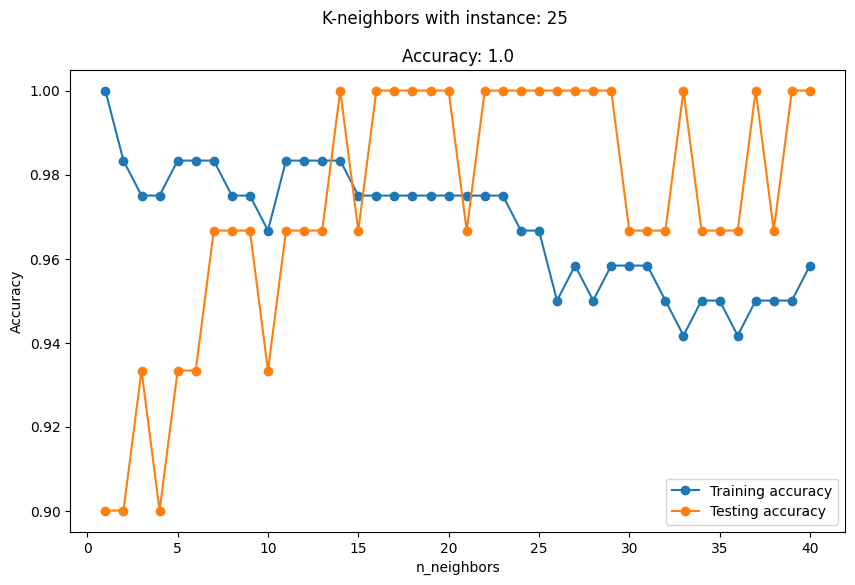

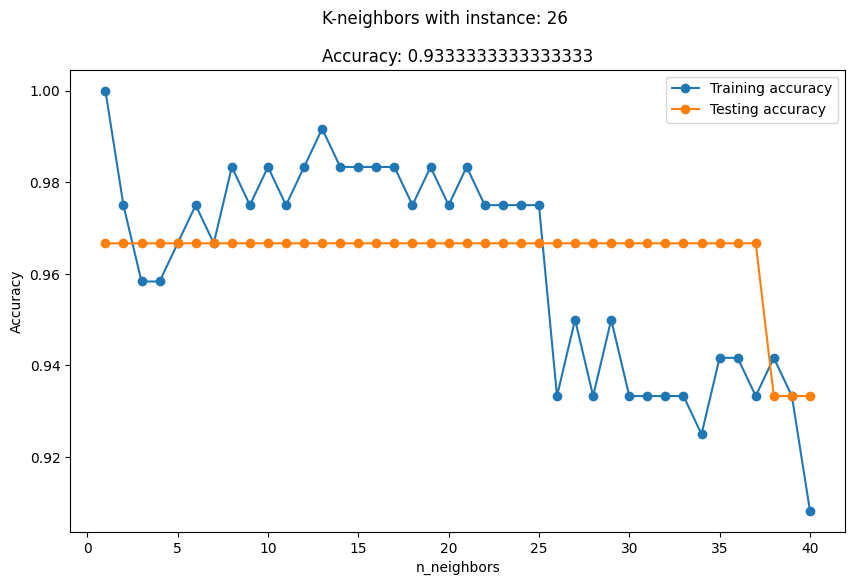

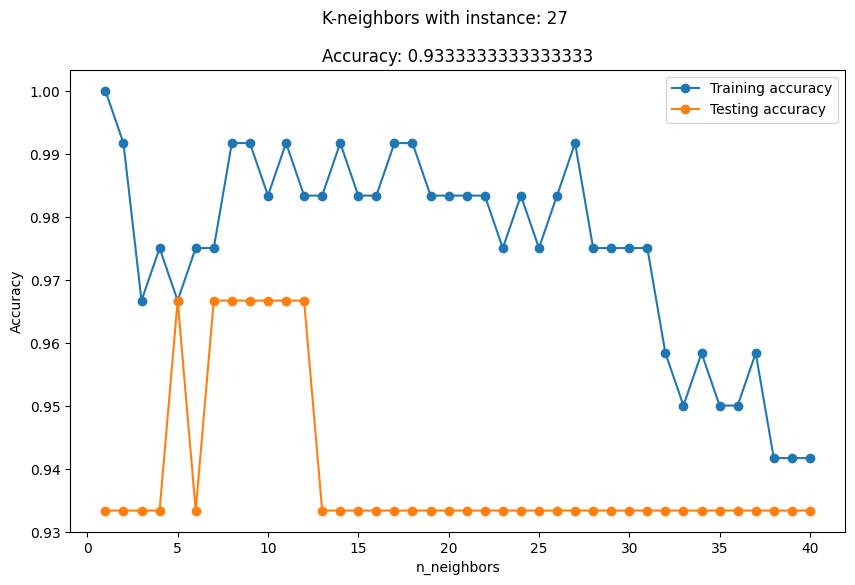

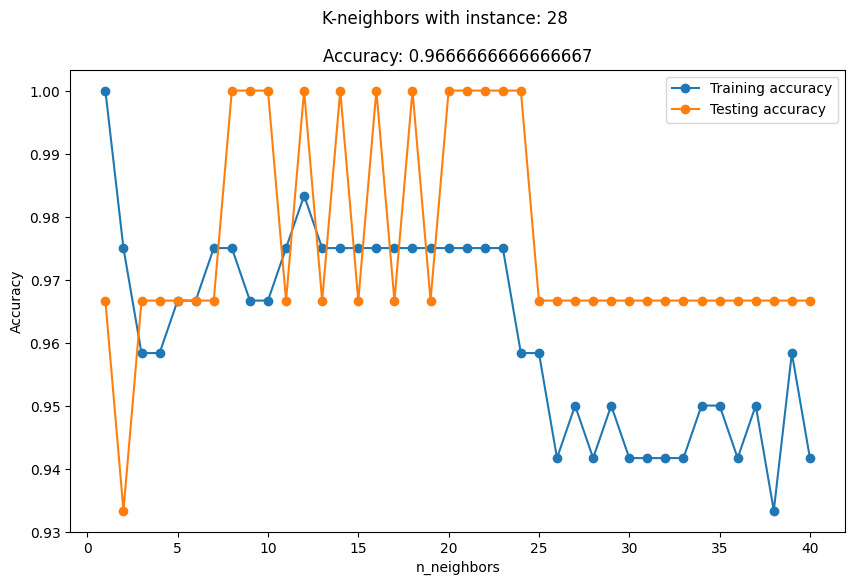

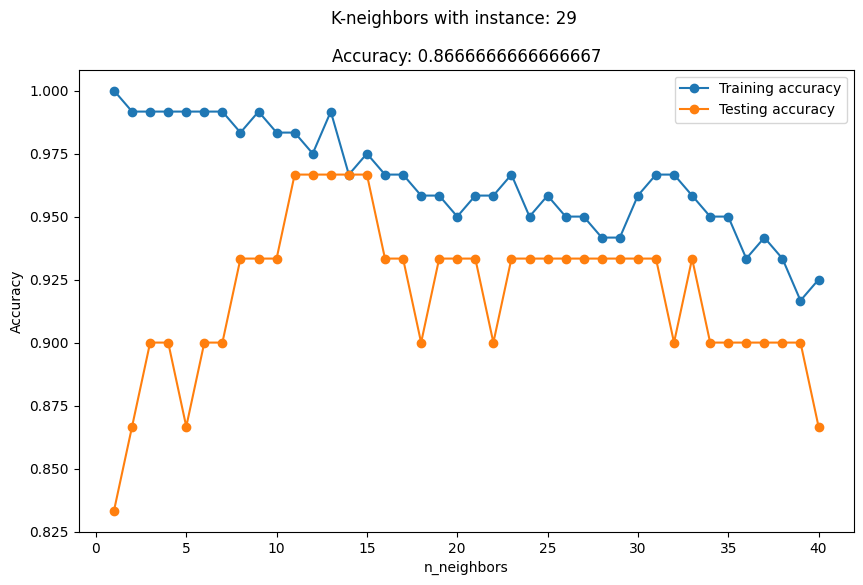

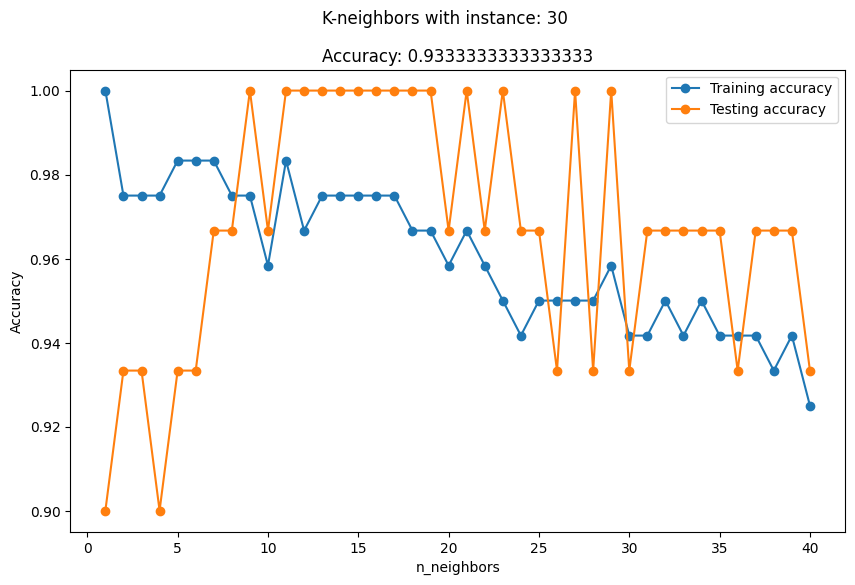

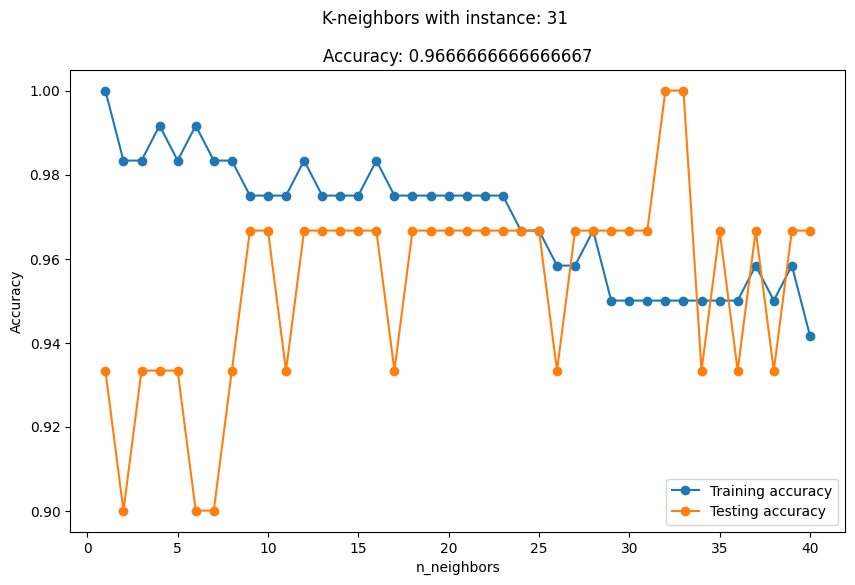

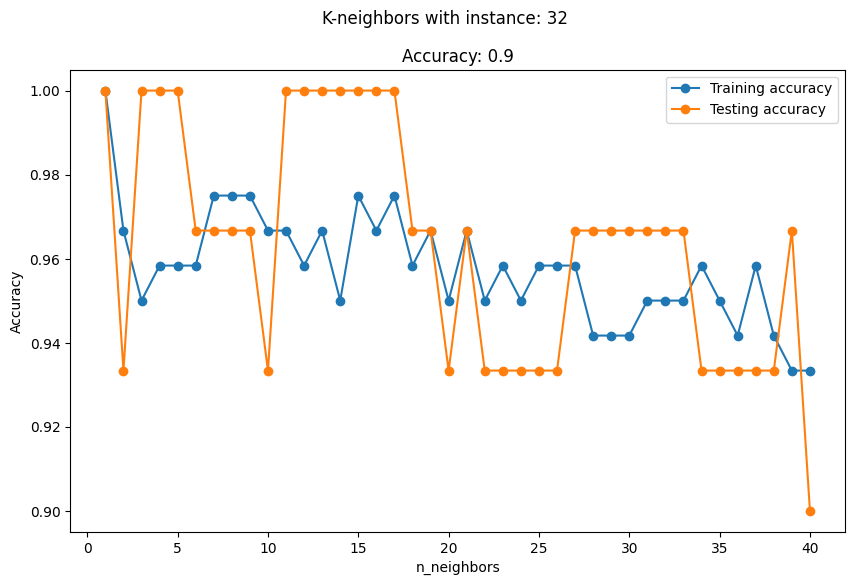

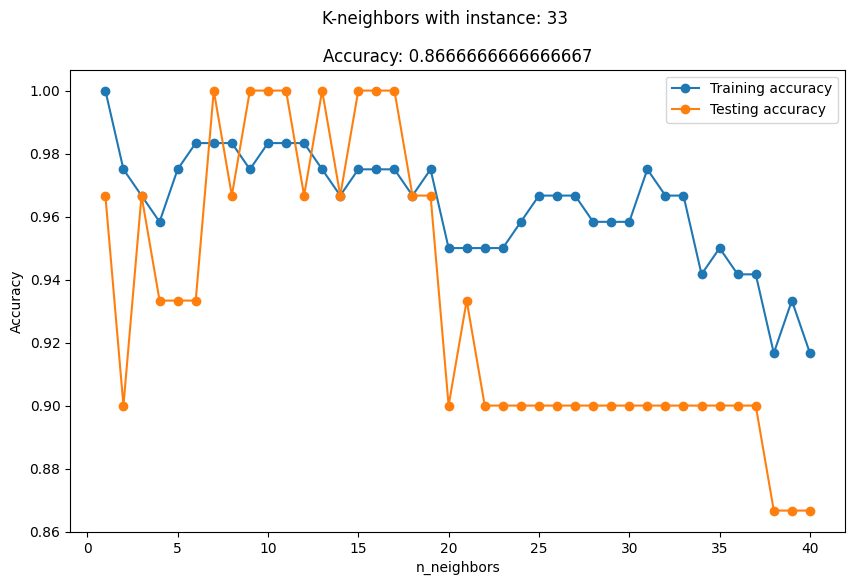

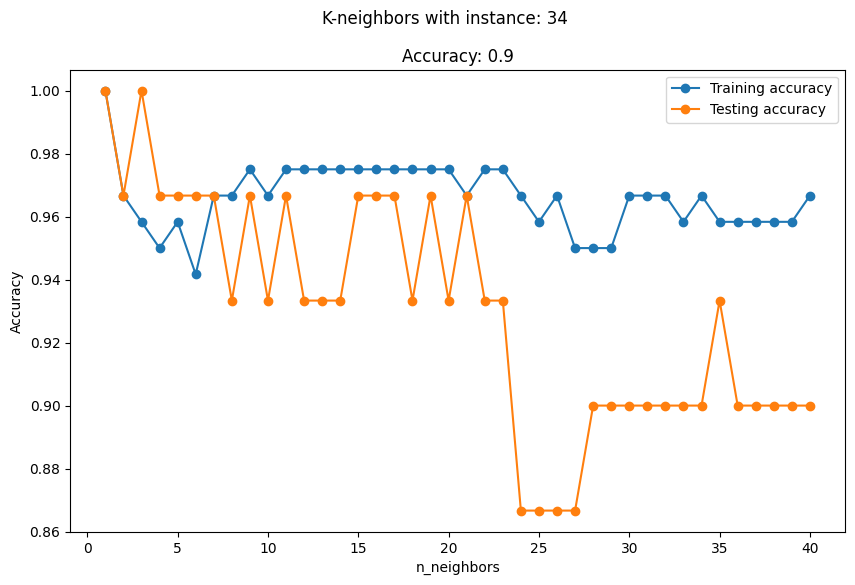

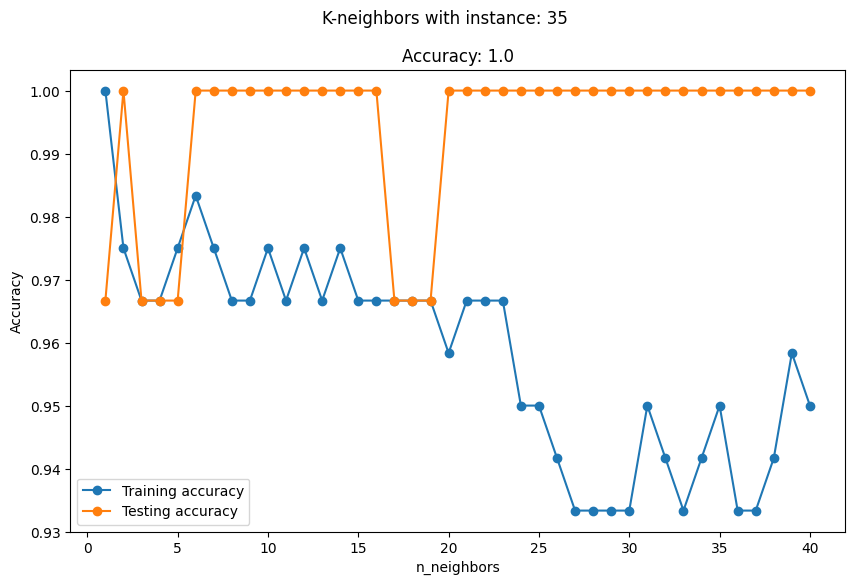

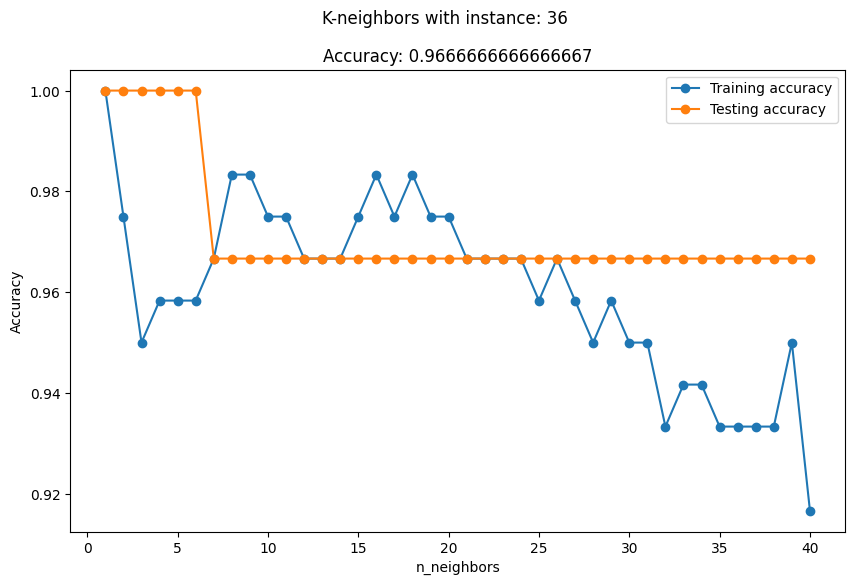

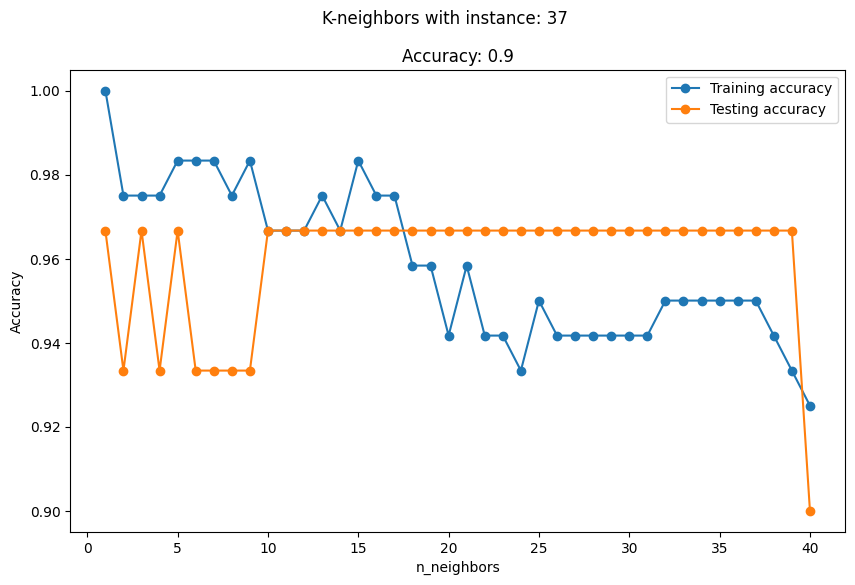

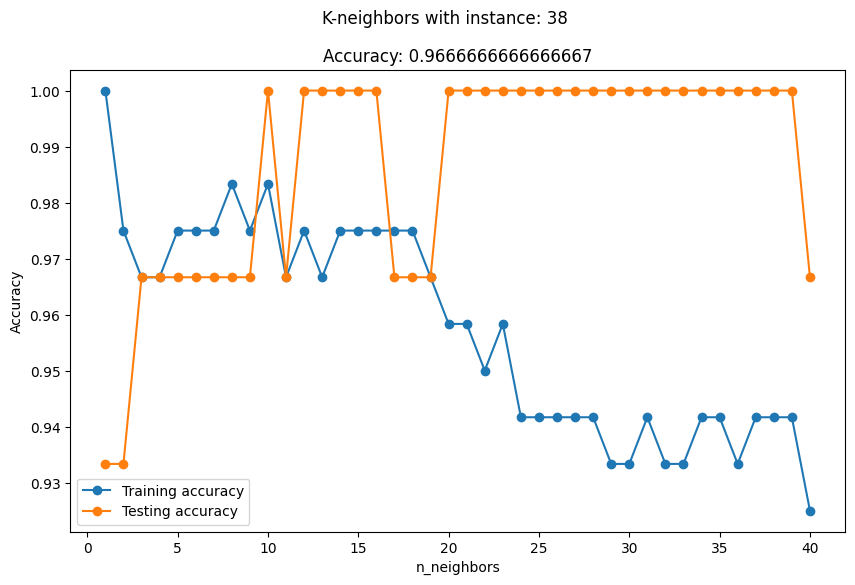

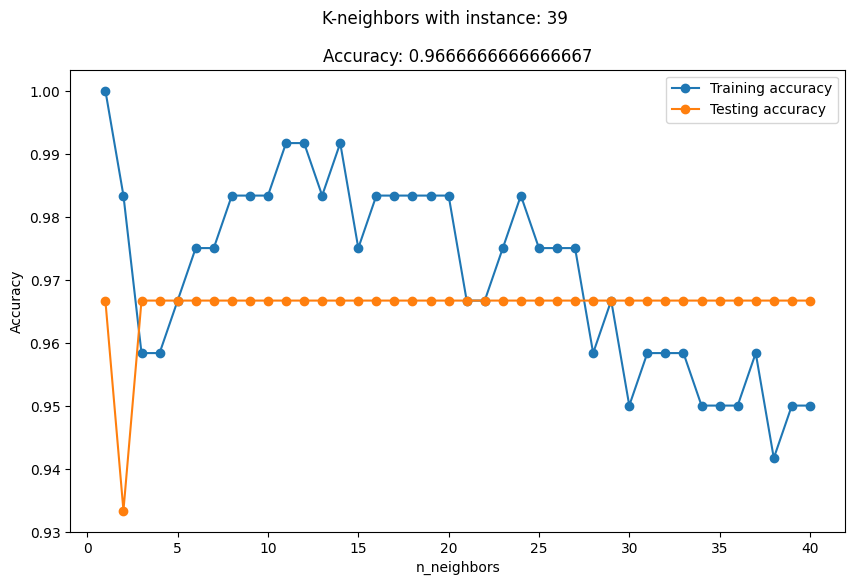

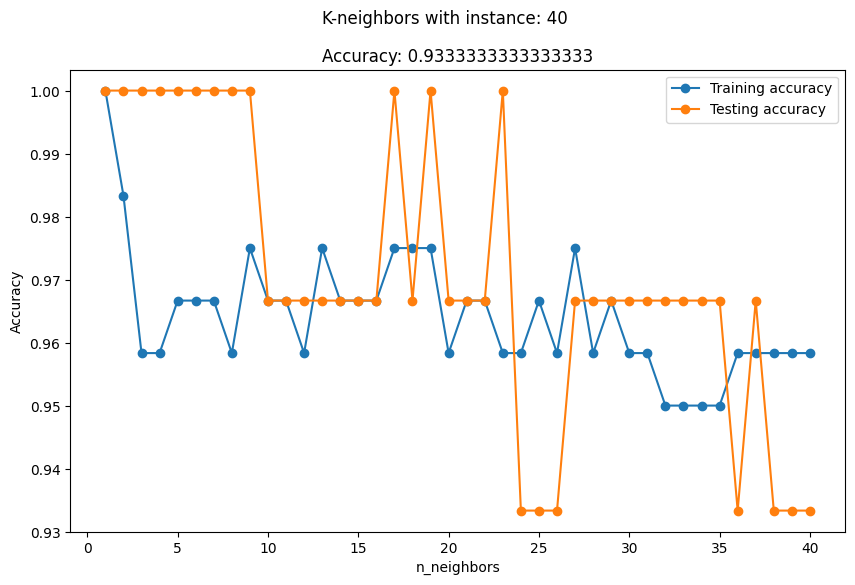

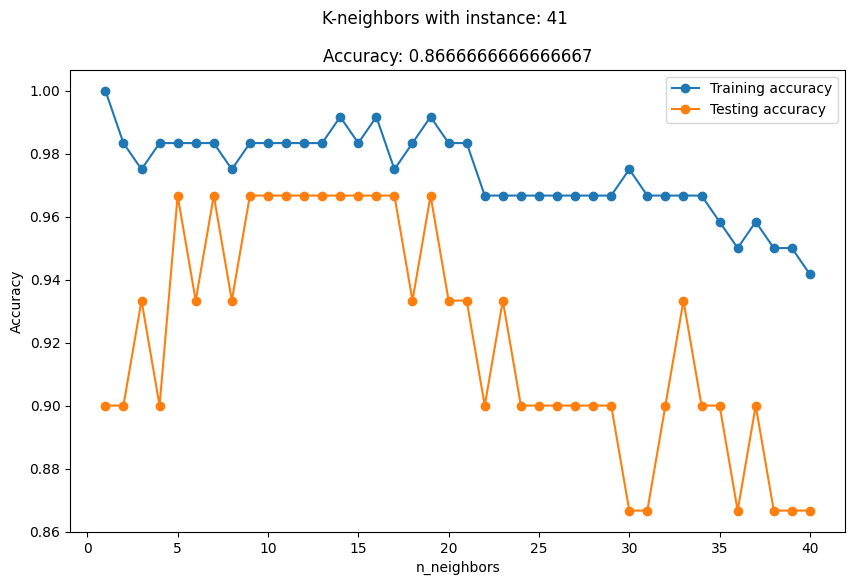

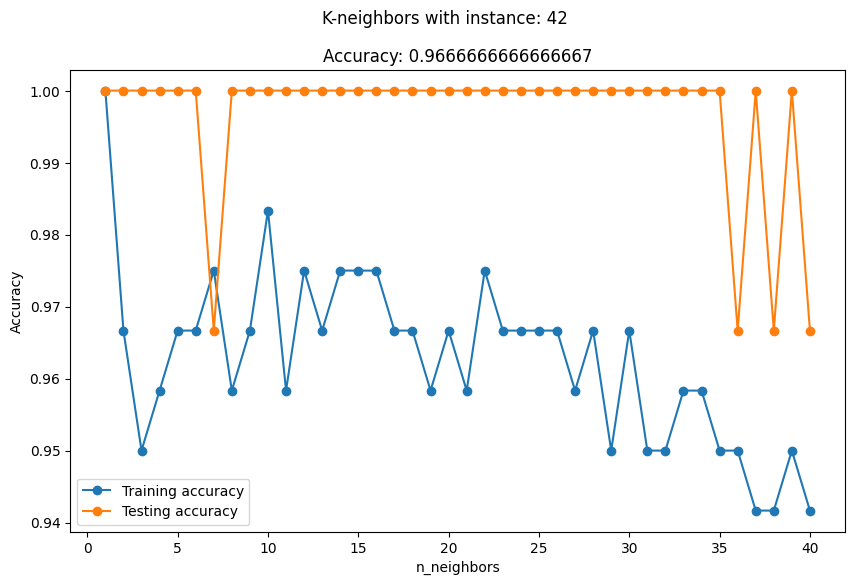

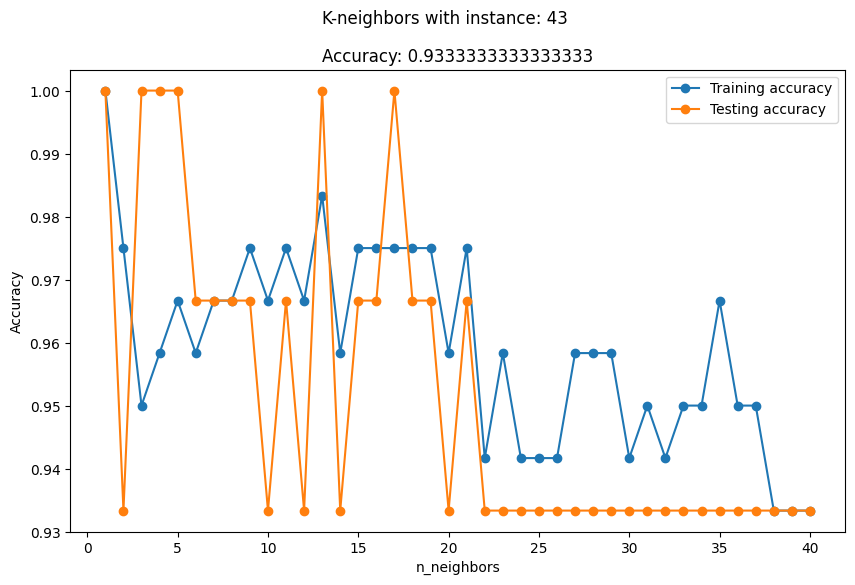

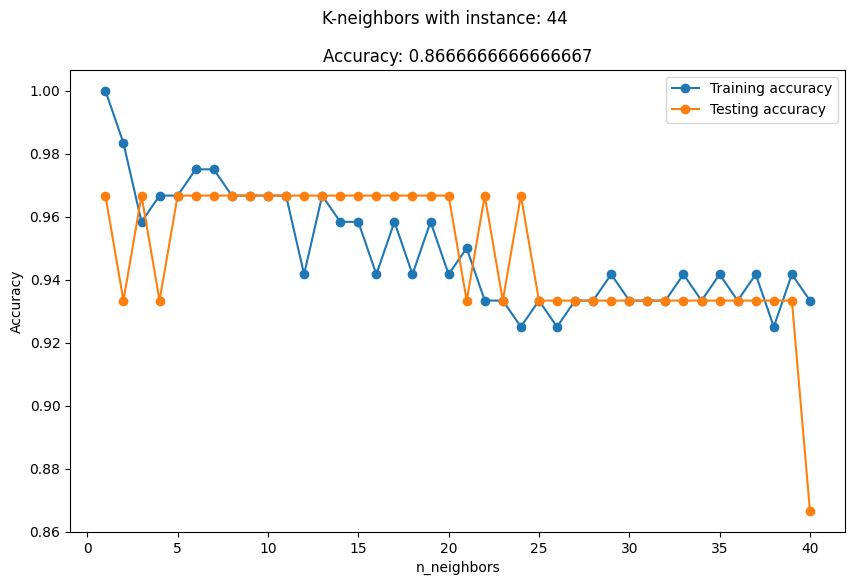

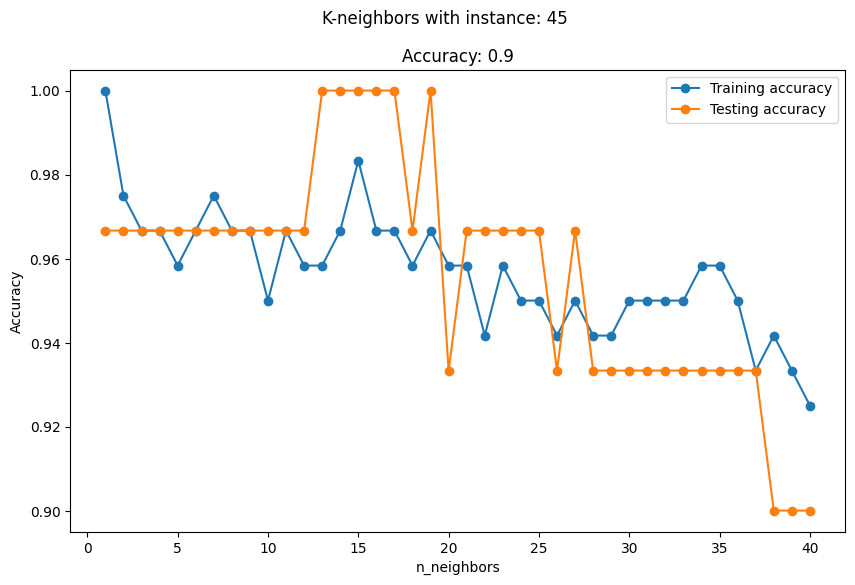

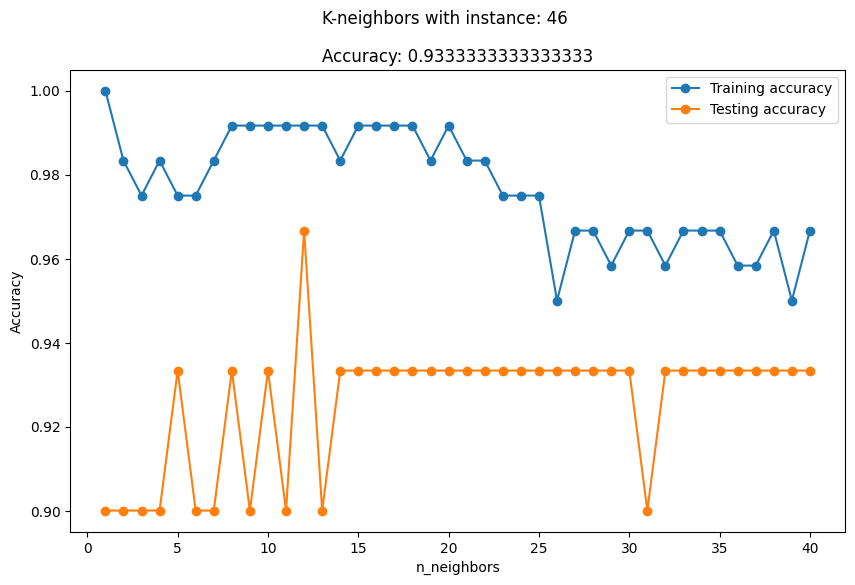

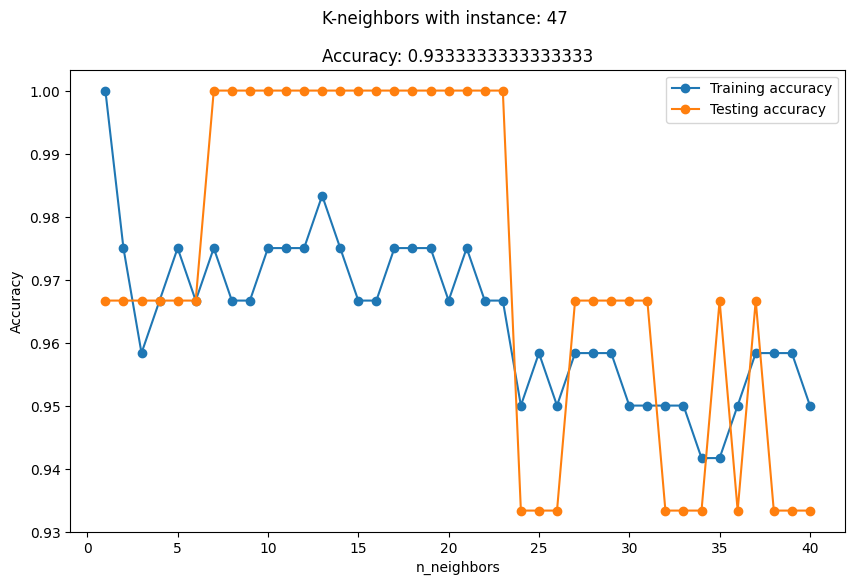

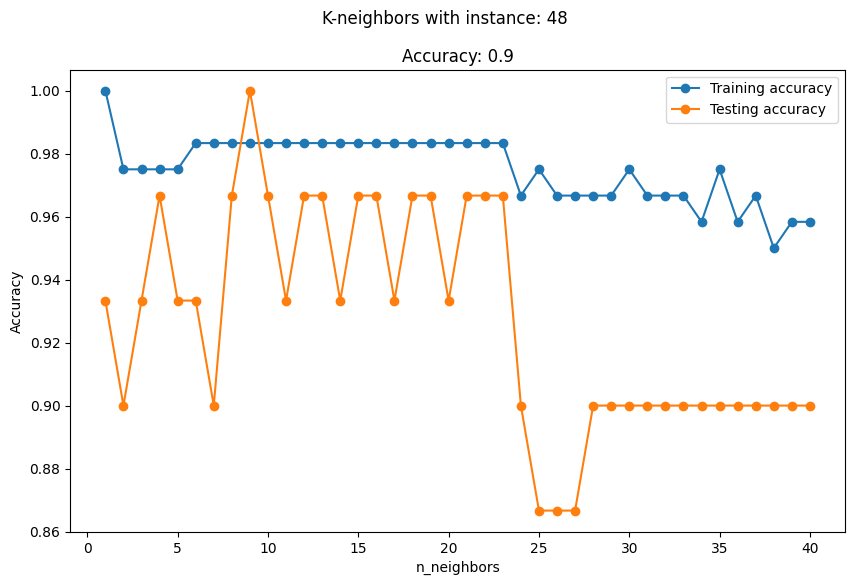

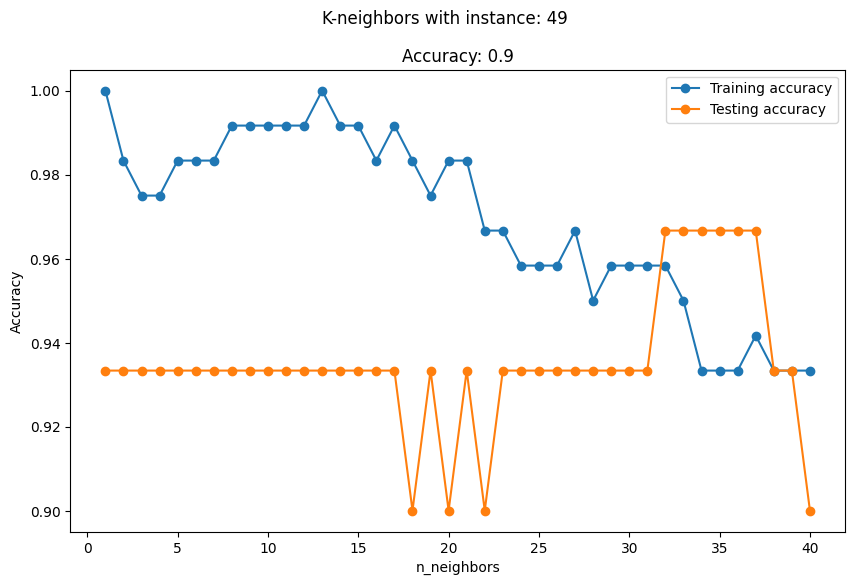

In [140]:
plot_instance(iris_data['data'], iris_data['target'], k_range = (1,40), instances=50)